In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
cols_to_drop = ['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber']
df_processed = df.drop(columns=cols_to_drop)
df_processed['Attrition'] = df_processed['Attrition'].map({'Yes': 1, 'No': 0})

In [4]:
X = df_processed.drop('Attrition', axis=1)
X = pd.get_dummies(X, drop_first=True)
y = df_processed['Attrition']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [6]:
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

In [7]:
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['Actual No (0)', 'Actual Yes (1)'], columns=['Predicted No (0)', 'Predicted Yes (1)'])

Text(50.72222222222221, 0.5, 'True Label')

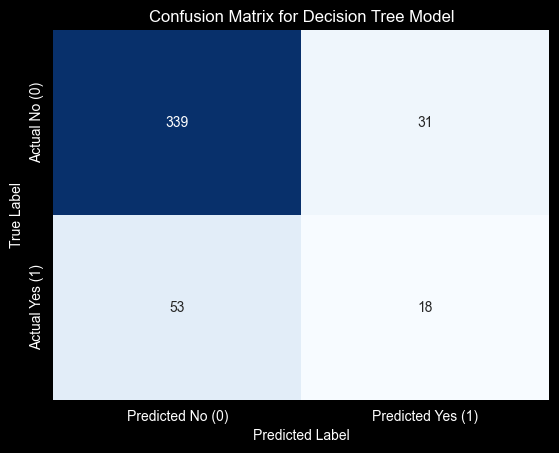

In [9]:
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Decision Tree Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')